# Market Pulse: Volatility, Correlation, and Risk Across China-Focused ETFs (vs S&P 500)

**Abstract**
This mini-project explores how major China-focused equity ETFs compare with the S&P 500 in terms of volatility, correlation, and downside risk. Using adjusted close prices from Yahoo Finance, we compute log-returns, annualized volatility, Sharpe ratios (rf≈0), and drawdowns. The goal is to reveal simple, data-driven patterns that explain how these assets behave across market regimes.

**Research Questions**
* Which ETFs are the most volatile and which are the most stable?
* How strongly are China-focused ETFs correlated with each other versus with the S&P 500?
* How large were their peak-to-trough losses (max drawdowns)?
* How do results change across key periods (pre-COVID, COVID shock, post-peak tightening, recent)?

**Data & Methods**
* **Source:** Yahoo Finance (via `yfinance`).
* **Assets:** ASHR (A-Shares), FXI (Large Cap), KWEB (Tech), MCHI (MSCI China), SPY (S&P 500 Benchmark).
* **Metrics:** Annualized Volatility ($\sigma\sqrt{252}$), Sharpe Ratio, Maximum Drawdown.

In [3]:
import sys
import pandas as pd
from pathlib import Path
from IPython.display import Image, display

# 1. Setup Project Root Path
# Since this notebook is in 'presentation/', we need to add the parent dir to sys.path
# to import the 'mpulse' package correctly.
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project Root set to: {PROJECT_ROOT}")

# 2. Import project modules
from mpulse.data_io import load_csv
from mpulse.compute import (
    log_returns, 
    annualized_vol, 
    max_drawdown, 
    sharpe_ratio, 
    period_performance
)

Project Root set to: /Users/guofangli/market-pulse-cn


1. Normalized Price History (Base=100)


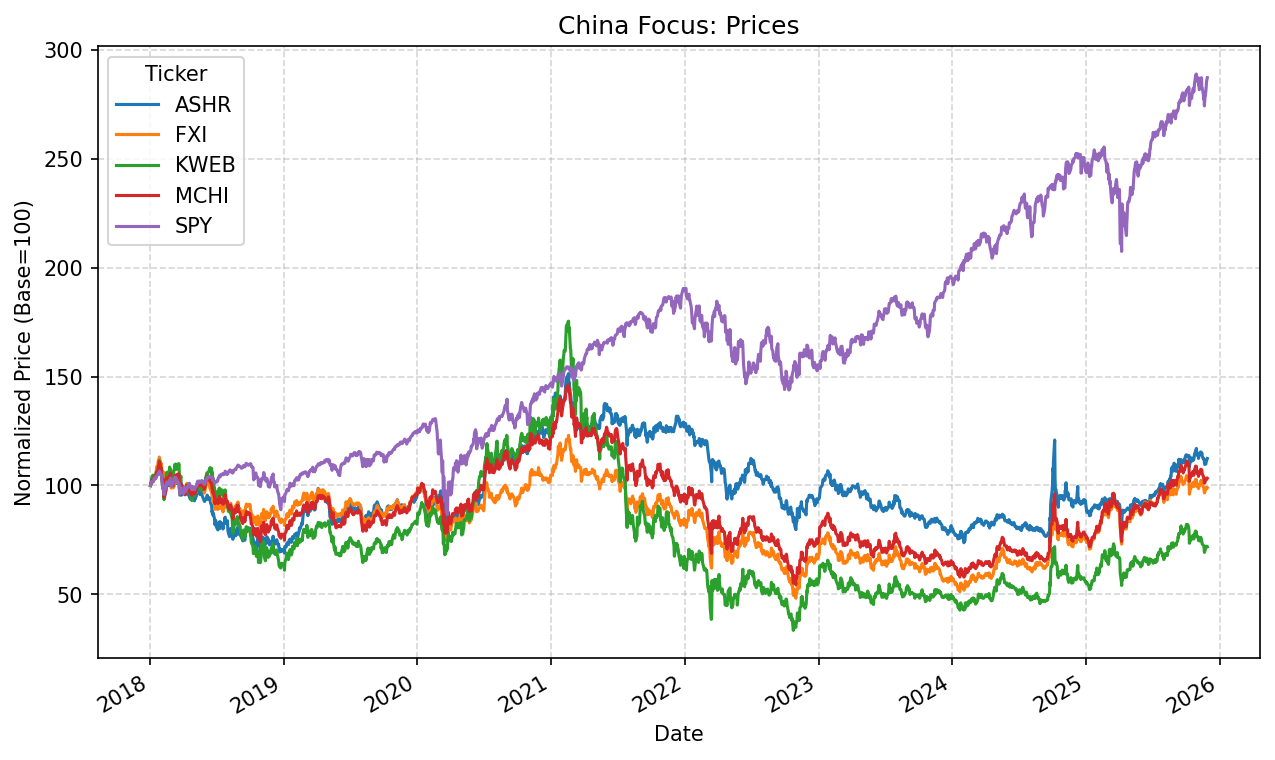


2. Drawdown Profile (Downside Risk)


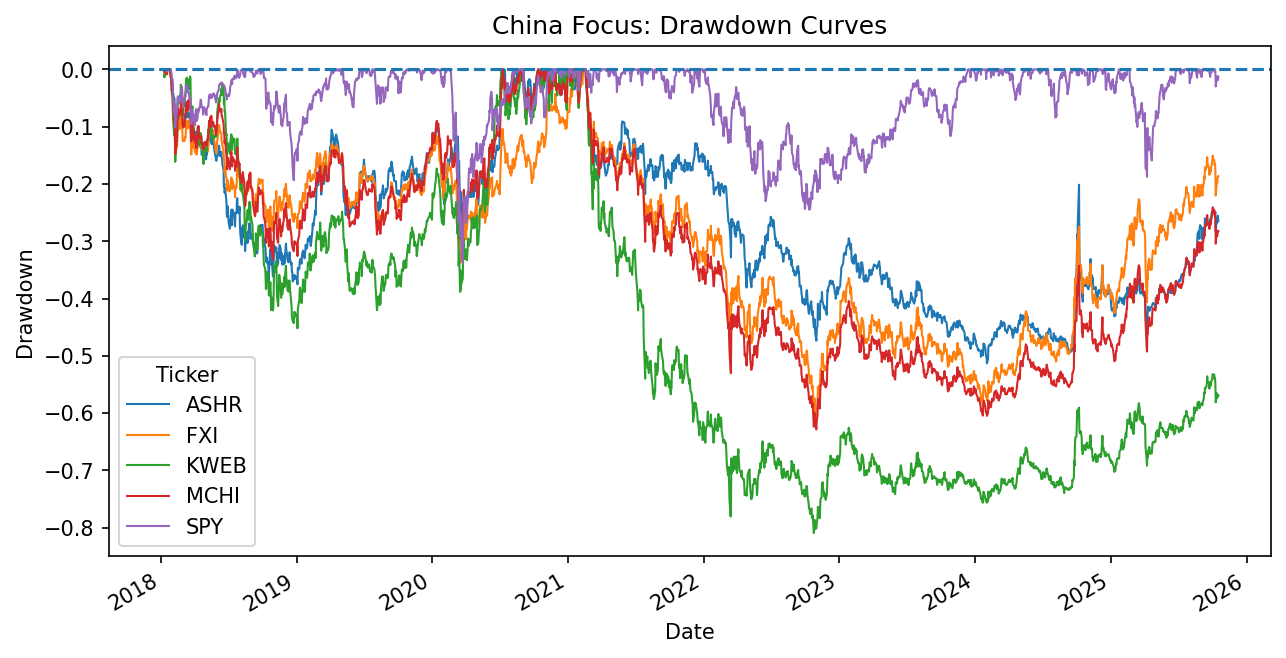


3. Rolling Volatility (63-day window)


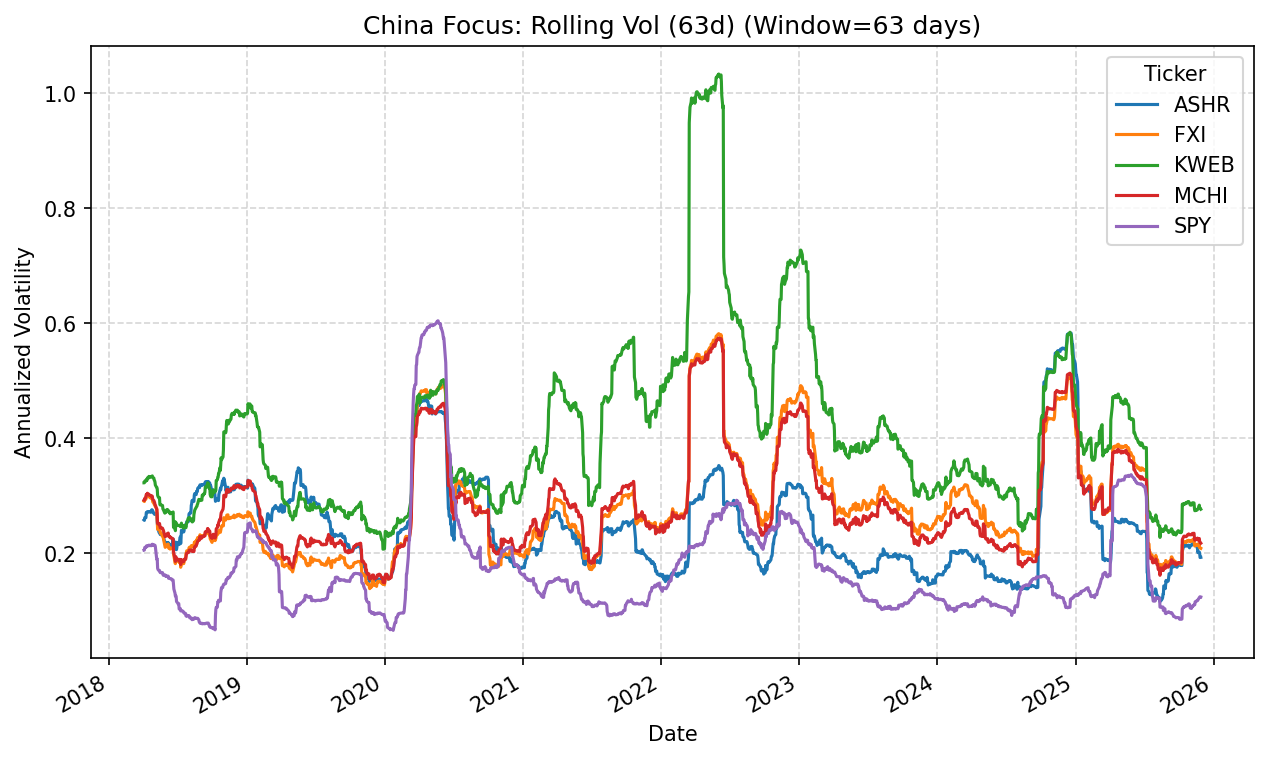


4. Correlation Heatmap


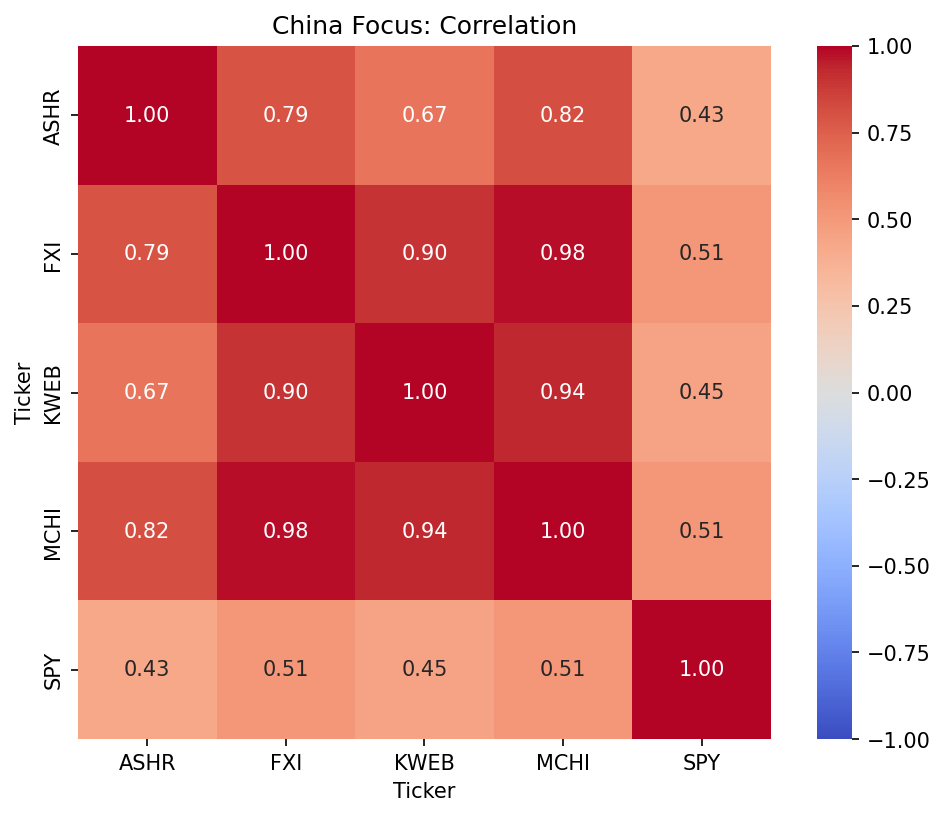

In [4]:
from IPython.display import Image, display
from pathlib import Path

figures_dir = PROJECT_ROOT / "figures"

# 1. Price History
print("1. Normalized Price History (Base=100)")
display(Image(filename=figures_dir / "prices.png"))

# 2. Drawdowns
print("\n2. Drawdown Profile (Downside Risk)")
display(Image(filename=figures_dir / "drawdowns.png"))

# 3. Rolling Volatility
print("\n3. Rolling Volatility (63-day window)")
display(Image(filename=figures_dir / "rolling_vol.png"))

# 4. Correlation
print("\n4. Correlation Heatmap")
display(Image(filename=figures_dir / "corr_heatmap.png"))

In [5]:
# 1. Imports (No mpulse.viz needed here!)
from mpulse.data_io import load_csv
from mpulse.compute import log_returns, annualized_vol, max_drawdown, sharpe_ratio
from IPython.display import Image, display
import pandas as pd

# 2. Load Data & Compute Returns
try:
    prices = load_csv("clean_prices")
    rets = log_returns(prices)

    # 3. Print Data Metadata professionally
    print("✅ Data Loaded Successfully")
    print(f"• Date Range : {prices.index.min().date()} to {prices.index.max().date()}")
    print(f"• Assets     : {', '.join(prices.columns)}")
    print(f"• Total Days : {len(prices)}")

except FileNotFoundError:
    print("❌ Error: 'clean_prices.csv' not found. Please run 'python demo.py' first.")

✅ Data Loaded Successfully
• Date Range : 2018-01-02 to 2025-11-28
• Assets     : ASHR, FXI, KWEB, MCHI, SPY
• Total Days : 1989


In [6]:
from IPython.display import Markdown

# 动态获取数据范围（防止变量未定义报错）
s_date = prices.index.min().date()
e_date = prices.index.max().date()
asset_list = ", ".join(prices.columns)

Markdown(f"""
### Data & Methods

* **Source**: Yahoo Finance via `yfinance` (adjusted close).
* **Sample Period**: {s_date} to {e_date}
* **Assets**: {asset_list}
* **Pre-processing**: Align trading days, forward-fill missing values (handling holidays), compute log-returns.
* **Metrics**:
    * **Annualized Volatility**: $\sigma_{{daily}} \\times \sqrt{{252}}$
    * **Sharpe Ratio**: $(\mu_{{daily}} \\times 252) / (\sigma_{{daily}} \\times \sqrt{{252}})$, assuming $R_f \\approx 0$ for comparison.
    * **Max Drawdown**: $ \\frac{{Price_t}}{{RollingPeak_t}} - 1 $
""")

<>:22: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:19: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:20: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
<>:19: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:19: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:22: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:19: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences wil


### Data & Methods

* **Source**: Yahoo Finance via `yfinance` (adjusted close).
* **Sample Period**: 2018-01-02 to 2025-11-28
* **Assets**: ASHR, FXI, KWEB, MCHI, SPY
* **Pre-processing**: Align trading days, forward-fill missing values (handling holidays), compute log-returns.
* **Metrics**:
    * **Annualized Volatility**: $\sigma_{daily} \times \sqrt{252}$
    * **Sharpe Ratio**: $(\mu_{daily} \times 252) / (\sigma_{daily} \times \sqrt{252})$, assuming $R_f \approx 0$ for comparison.
    * **Max Drawdown**: $ \frac{Price_t}{RollingPeak_t} - 1 $


In [8]:
# 1. Compute headline metrics for all assets
summary = pd.DataFrame({
    "Ann. Volatility": annualized_vol(rets),
    "Sharpe Ratio": sharpe_ratio(rets),
    "Max Drawdown": max_drawdown(prices)
})

# 2. Sort alphabetically by asset name to ensure consistent order
summary = summary.sort_index()

# 3. Display the table (Plain version without styling dependency)
print("--- Headline Risk-Return Metrics ---")
display(summary.round(3))

--- Headline Risk-Return Metrics ---


,Ann. Volatility,Sharpe Ratio,Max Drawdown
ASHR,0.259,0.057,-0.513
FXI,0.296,-0.004,-0.608
KWEB,0.428,-0.098,-0.809
MCHI,0.293,0.014,-0.628
SPY,0.196,0.683,-0.337


1. Normalized Price History (Base=100)


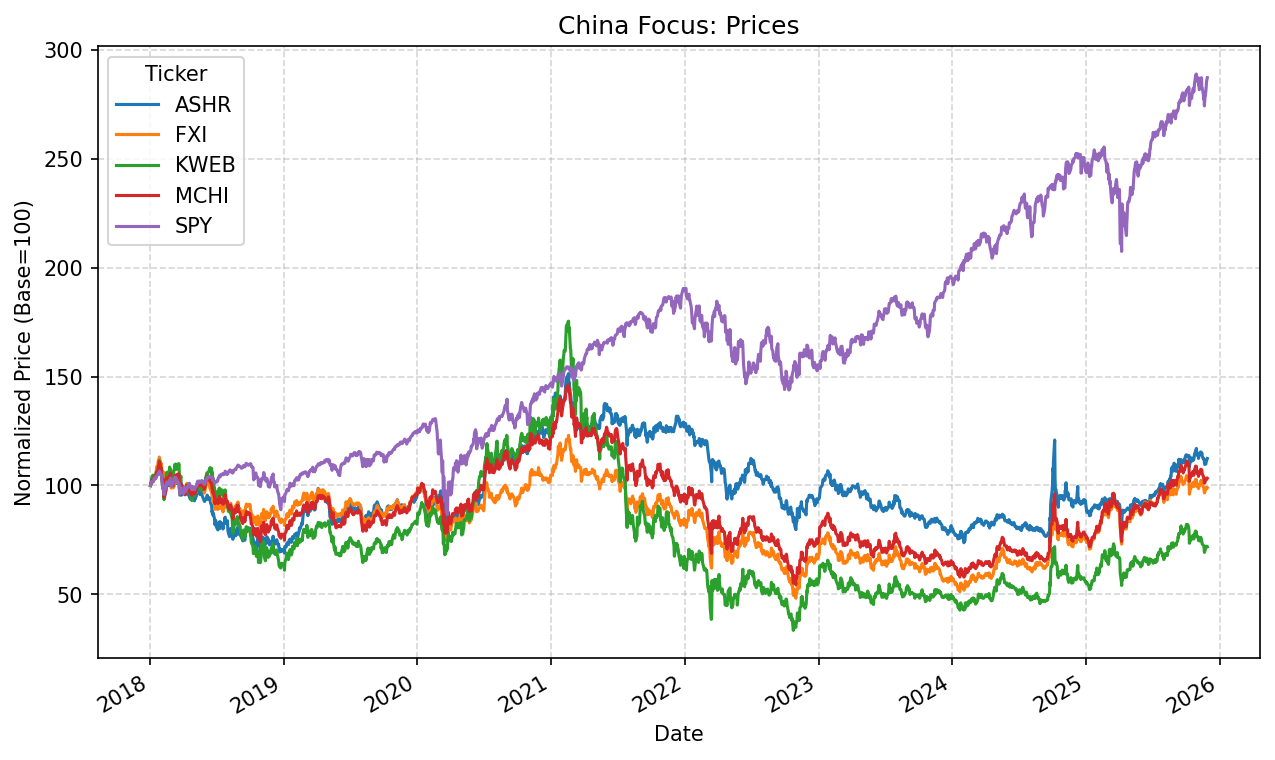


2. Drawdown Profile (Downside Risk)


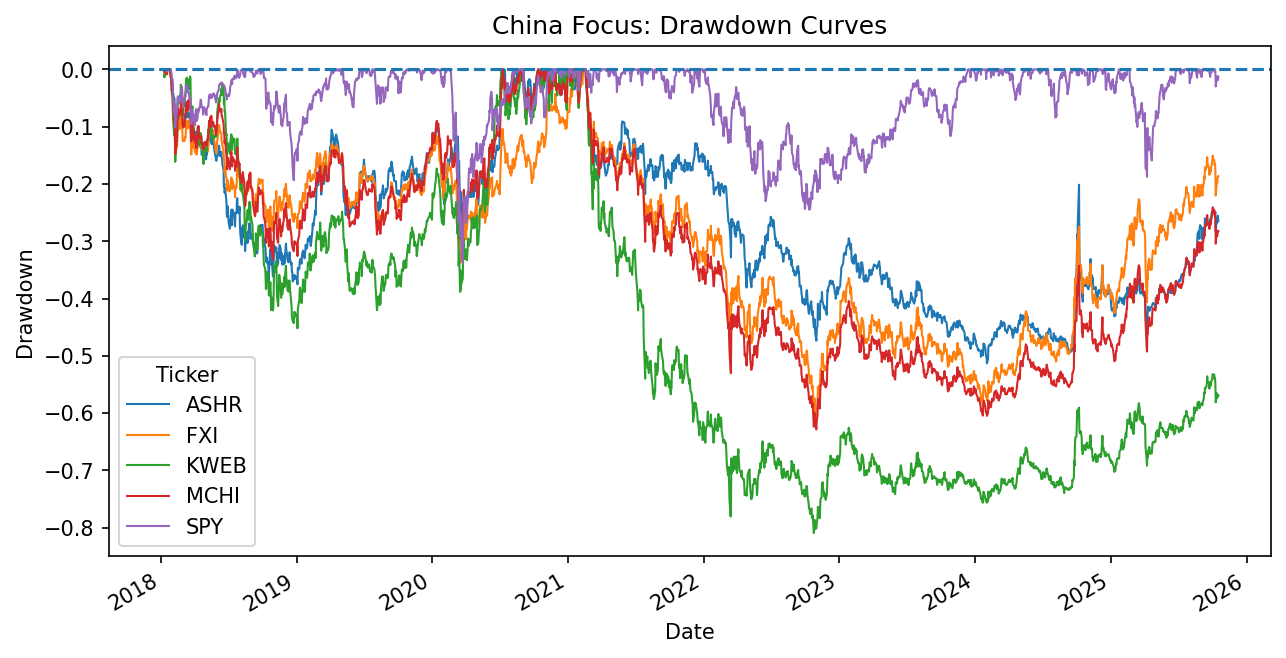


3. Rolling Volatility (63-day window)


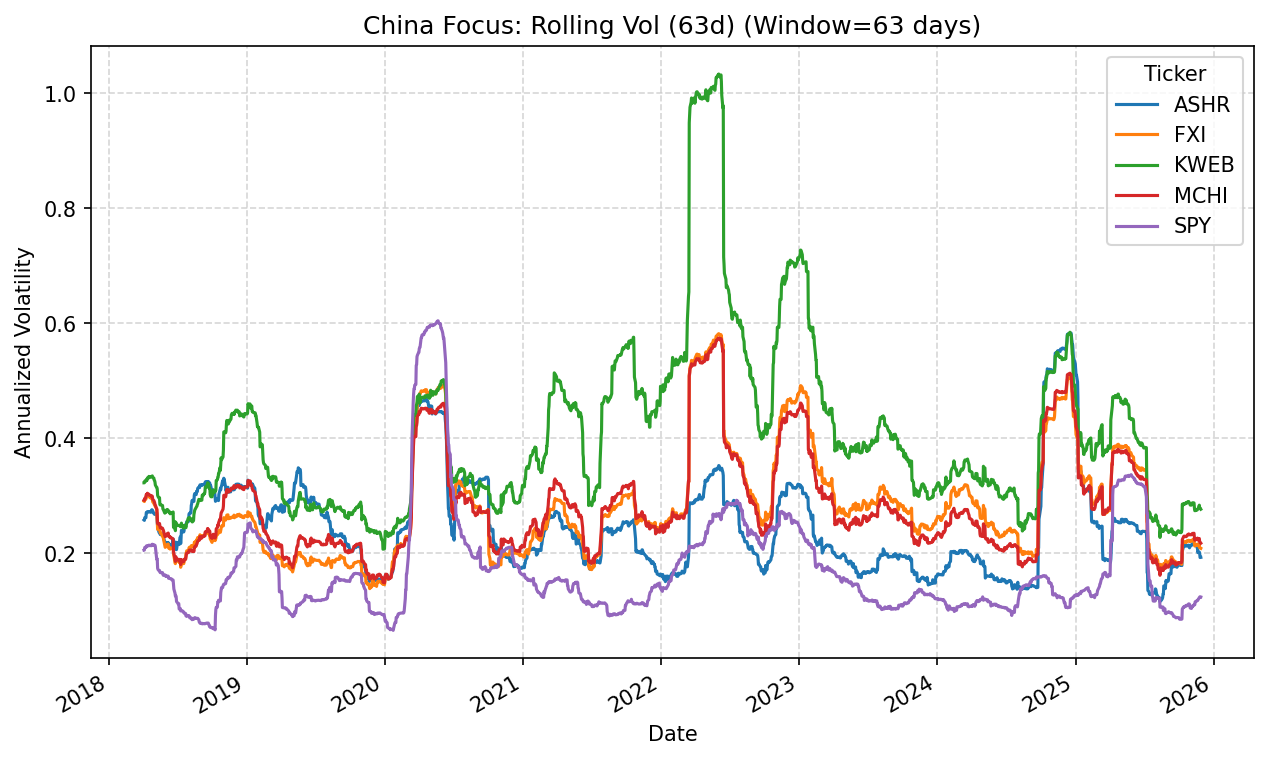


4. Correlation Heatmap


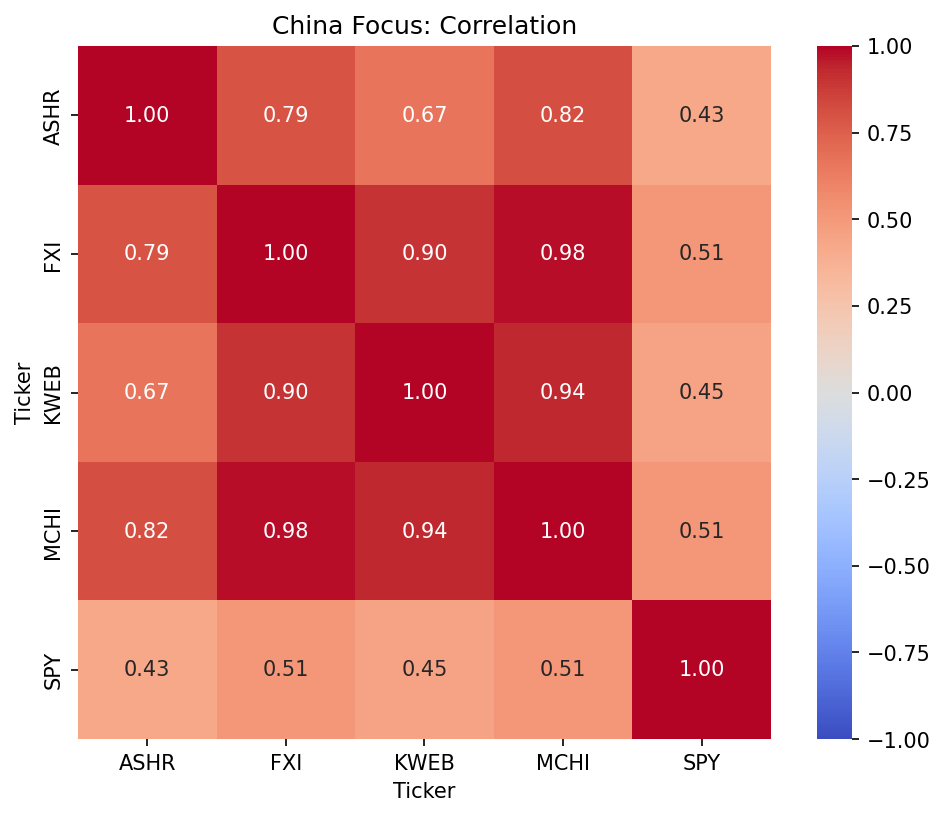

In [9]:
from IPython.display import Image, display

# Define figures directory
figures_dir = PROJECT_ROOT / "figures"

print("1. Normalized Price History (Base=100)")
# 使用 try-except 确保即使图片不存在也不会崩，而是给提示
try:
    display(Image(filename=figures_dir / "prices.png"))
except:
    print("Image not found. Run demo.py first.")

print("\n2. Drawdown Profile (Downside Risk)")
try:
    display(Image(filename=figures_dir / "drawdowns.png"))
except:
    pass

print("\n3. Rolling Volatility (63-day window)")
try:
    display(Image(filename=figures_dir / "rolling_vol.png"))
except:
    pass

print("\n4. Correlation Heatmap")
try:
    display(Image(filename=figures_dir / "corr_heatmap.png"))
except:
    pass

In [11]:
import numpy as np  
# --- Deep Dive: Correlation Analysis ---

# 1. Calculate Correlation Matrix
corr = rets.corr()

# 2. Flatten the matrix to find the highest correlated pairs
# We use a mask to ignore the diagonal (self-correlation is always 1.0)
mask = ~np.eye(len(corr), dtype=bool)

pairs = (
    corr.where(mask)
    .stack()
    .rename("Correlation")
    .sort_values(ascending=False)
)

# 3. Filter out duplicates (since A-B is the same as B-A)
# We simply take every second element because the matrix is symmetric
top_pairs = pairs.iloc[::2]

print("--- Top 5 Highest Correlated Pairs ---")
display(top_pairs.head(5).to_frame())

--- Top 5 Highest Correlated Pairs ---


Correlation
MCHI FXI      0.977258
KWEB MCHI     0.935754
     FXI      0.902534
ASHR MCHI     0.815156
     FXI      0.792216

In [13]:
# Define market regimes for deeper analysis
last_date = prices.index.max().strftime("%Y-%m-%d")

periods = [
    ("Pre-COVID", "2018-01-01", "2019-12-31"),
    ("COVID Shock", "2020-01-01", "2020-12-31"),
    ("Post-Peak Tightening", "2021-01-01", "2022-12-31"),
    ("Recent Recovery", "2023-01-01", last_date),
]

# Compute performance metrics for each period
perf_table = period_performance(prices, periods)

print("--- Regime Analysis: Performance Across Market Cycles ---")
display(perf_table.round(3))

--- Regime Analysis: Performance Across Market Cycles ---


Metric               CumRet                             AnnVol                \
Asset                  ASHR    FXI   KWEB   MCHI    SPY   ASHR    FXI   KWEB   
Pre-COVID            -0.041 -0.037 -0.178 -0.045  0.243  0.260  0.213  0.307   
COVID Shock           0.335  0.059  0.489  0.237  0.172  0.316  0.319  0.360   
Post-Peak Tightening -0.297 -0.364 -0.577 -0.398  0.068  0.247  0.352  0.605   
Recent Recovery       0.194  0.436  0.243  0.354  0.861  0.244  0.293  0.368   

Metric                             Sharpe                              
Asset                  MCHI    SPY   ASHR    FXI   KWEB   MCHI    SPY  
Pre-COVID             0.232  0.150 -0.081 -0.089 -0.321 -0.099  0.729  
COVID Shock           0.309  0.337  0.914  0.179  1.105  0.686  0.472  
Post-Peak Tightening  0.349  0.195 -0.717 -0.645 -0.714 -0.729  0.169  
Recent Recovery       0.281  0.154  0.250  0.427  0.205  0.373  1.391

### Conclusion & Key Takeaways

Based on the quantitative analysis of price history, volatility dynamics, and correlation structures, we observe the following:

1.  **Risk Profile**: **KWEB (China Tech)** exhibits the highest volatility and deepest drawdowns (exceeding -80% from peak), reflecting the regulatory and market headwinds in the sector. In contrast, **SPY (S&P 500)** maintains the lowest risk profile.
2.  **Correlation Structure**: China-focused ETFs (MCHI, FXI, KWEB) are **highly correlated with each other** (>0.85) but show significantly lower correlation with the US market (SPY). This suggests that while risky, they offer distinct diversification properties.
3.  **Regime Changes**: Rolling volatility spiked globally during the **2020 COVID shock**. While US markets stabilized quickly, China-focused assets maintained elevated volatility levels for a longer duration before moderating in late 2023.
4.  **Performance Divergence**: In the most recent period, **SPY** has delivered superior risk-adjusted returns (highest Sharpe Ratio), while China-focused assets are still recovering from their drawdowns.